In [27]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [28]:
df = pd.read_csv('Data/Processed/ChurnModelling_Binning_Applied.csv')
df


,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,HasInternet,TenureBins
0,Female,0,1,0,0,0,DSL,0,1,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,New
1,Male,0,0,0,1,0,DSL,1,0,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,Mature
2,Male,0,0,0,1,0,DSL,1,1,0,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,New
3,Male,0,0,0,0,0,DSL,1,0,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,Mature
4,Female,0,0,0,1,0,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,New
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,1,1,1,1,DSL,1,0,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,1,Established
7039,Female,0,1,1,1,1,Fiber optic,0,1,1,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,1,Loyal
7040,Female,0,1,1,0,0,DSL,1,0,0,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,1,Early
7041,Male,1,1,0,1,1,Fiber optic,0,0,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,1,New


In [29]:
numerical_features = ['MonthlyCharges','TotalCharges']
nominal_features = ['gender', 'InternetService', 'Contract', 'PaymentMethod']
ordinal_features = ['TenureBins']
remainder_features = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines', 'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling','Churn','HasInternet']

numerical_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())
    ]
    
) 

nominal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value = 'missing')),
        ('encoder', OneHotEncoder())
    ]
    
)

ordinal_transformer = Pipeline(
    steps=[
        ('imputer', SimpleImputer(strategy='constant',
                                  fill_value = 'missing')),
        ('encoder', OrdinalEncoder())
    ]
    
)

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('nom', nominal_transformer, nominal_features),
        ('ord', ordinal_transformer, ordinal_features)
    ],
    remainder='drop'
)

nominal_feature_names =[]
for feature in nominal_features:
    unique_values = df[feature].unique()
    # print(unique_values)
    nominal_feature_names.extend([f"{feature}_{val}" for val in unique_values])


df_cp = df.copy()
df_transformed = pd.DataFrame(
    preprocessor.fit_transform(df_cp),
    columns= numerical_features + nominal_feature_names + ordinal_features
)

df_remainder = df[remainder_features]
df_pp = pd.concat([df_transformed,df_remainder], axis=1)


df_pp = df_pp.drop('InternetService_No', axis = 1)
df_pp

,MonthlyCharges,TotalCharges,gender_Female,gender_Male,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Electronic check,...,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,HasInternet
0,-1.160323,-0.992611,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,1,0,0,0,0,1,0,1
1,-0.259629,-0.172165,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
2,-0.362660,-0.958066,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,1,1,0,0,0,0,1,1,1
3,-0.746535,-0.193672,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0,1,0,1,1,0,0,0,0,1
4,0.197365,-0.938874,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.665992,-0.127605,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,...,1,1,0,1,1,1,1,1,0,1
7039,1.277533,2.242606,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1,0,1,1,0,1,1,1,0,1
7040,-1.168632,-0.852932,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,1,0,0,0,0,0,1,0,1
7041,0.320338,-0.870513,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,0,0,0,0,1,1,1


In [30]:
df_pp.to_csv('Data/Processed/X_transformed.csv', index=False)

### 3. Handle Class Imbalances

In [31]:
X = df_pp.drop(columns=['Churn'])
Y = df_pp['Churn']

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,
    random_state=42
)

In [33]:
smote = SMOTE(random_state=42)
X_train_resampled, Y_train_resampled = smote.fit_resample(X_train, Y_train)

Text(0, 0.5, 'Count')

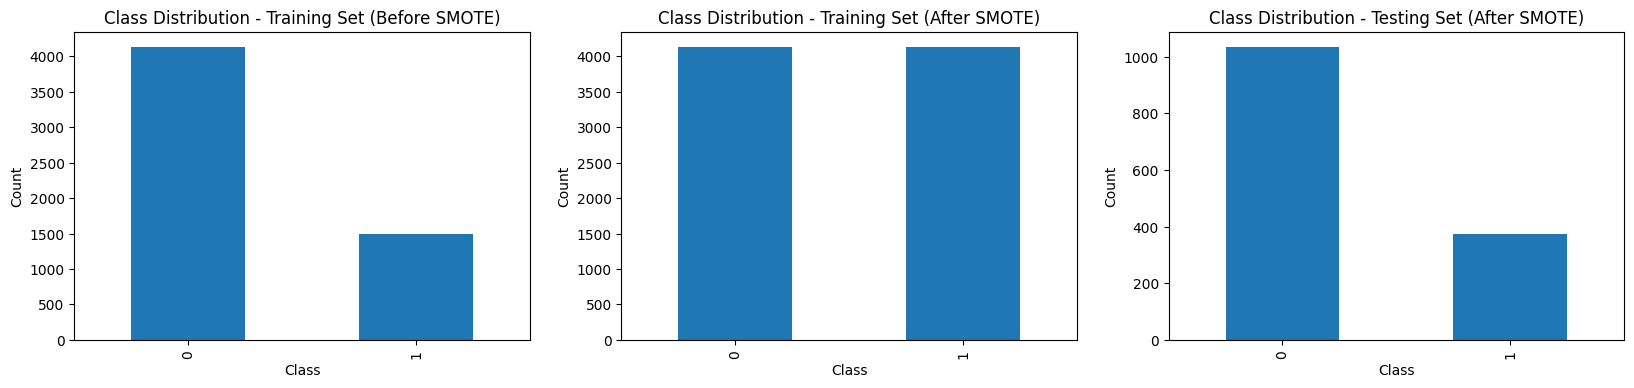

In [34]:
plt.figure(figsize=(20, 4))

plt.subplot(131)
Y_train.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (Before SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')


plt.subplot(132)
Y_train_resampled.value_counts().plot(kind='bar')
plt.title('Class Distribution - Training Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

plt.subplot(133)
Y_test.value_counts().plot(kind='bar')
plt.title('Class Distribution - Testing Set (After SMOTE)')
plt.xlabel('Class')
plt.ylabel('Count')

In [35]:
np.savez('Artifacts/X_train.npz', X_train_resampled)
np.savez('Artifacts/Y_train.npz', Y_train_resampled)
np.savez('Artifacts/X_test.npz', X_test)
np.savez('Artifacts/Y_test.npz', Y_test)